In [37]:
import pandas as pd
import numpy as np
import warnings
from utils import utils_gn, utils_sevsn, utils_noah, utils_models
from sklearn.svm import NuSVR
import importlib
importlib.reload(utils_gn)
importlib.reload(utils_sevsn)
importlib.reload(utils_noah)
importlib.reload(utils_models)
warnings.filterwarnings('ignore')

In [38]:
# read the data
df_raw = (utils_gn.read_data('severson_all.pkl')).drop('cycle_life', axis=1).join(utils_gn.read_data('noah_all.pkl'))
df = df_raw.copy()
df.head()

,mean_Q_100_10,log_mean_Q_100_10,var_Q_100_10,log_var_Q_100_10,min_Q_100_10,log_min_Q_100_10,skew_Q_100_10,log_skew_Q_100_10,kurt_Q_100_10,log_kurt_Q_100_10,...,dVdQpeak_maxmag_di_y_100m0,dVdQpeak_maxmag_di_y_diff,dVdQpeak_maxarea_di_y_0,dVdQpeak_maxarea_di_y_50,dVdQpeak_maxarea_di_y_100,dVdQpeak_maxarea_di_y_100m0,dVdQpeak_maxarea_di_y_diff,dSOHdCycCyc1,dSOHdCycCyc100,cycle_life
b1c0,-0.002873,-2.541602,0.000010,-5.014861,-0.008460,-2.072648,-0.532058,-0.274041,1.651688,0.217928,...,-0.005282,0.003144,-79.299389,-75.009448,-68.133388,11.166000,2.586119,0.000388,-0.000031,1851.0
b1c1,-0.004100,-2.387257,0.000010,-5.013960,-0.011004,-1.958457,-0.429375,-0.367163,1.970884,0.294661,...,0.001686,0.000501,-75.511329,-73.411862,-60.405989,15.105340,10.906407,0.000396,-0.000019,2159.0
b1c2,-0.004487,-2.348070,0.000018,-4.737000,-0.017216,-1.764058,-1.080194,0.033502,3.348637,0.524868,...,-0.005399,0.004043,-76.601709,-73.345940,-65.414446,11.187263,4.675725,0.000312,-0.000013,2236.0
b1c3,-0.007456,-2.127507,0.000036,-4.442613,-0.018961,-1.722149,-0.439050,-0.357486,1.904584,0.279800,...,-0.002219,0.012165,-80.446334,-67.731448,-55.749502,24.696832,-0.732940,0.000353,-0.000013,1433.0
b1c4,-0.005750,-2.240332,0.000023,-4.647744,-0.013958,-1.855177,-0.362548,-0.440634,1.666169,0.221719,...,0.002736,0.001597,-75.575598,-65.232594,-55.730088,19.845510,-0.840498,0.000347,-0.000030,1708.0


In [39]:
# prune cells with more than 1250 cycle life
df = df[df['cycle_life'] <= 1250]
df.index

Index(['b1c5', 'b1c6', 'b1c7', 'b1c9', 'b1c11', 'b1c14', 'b1c15', 'b1c16',
       'b1c17', 'b1c18',
       ...
       'b3c29', 'b3c30', 'b3c31', 'b3c34', 'b3c35', 'b3c36', 'b3c40', 'b3c41',
       'b3c43', 'b3c44'],
      dtype='object', length=113)

In [40]:
# define parameters to be used 
test_size=0.2
params={"nu": 0.3,
        "C": 0.01,
        "kernel": "linear"}

### NuSVR without scaling and feature selection

NuSVR training has started...
NuSVR training has ended after 0.01 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 67.30530814787352,
 'MAPE': 0.09631358697186221,
 'MSE': 6226.230428123273,
 'R2 score': 0.8635660127712455,
 'RMSE': 78.90646632642519}
Test:
{'MAE': 65.30517116516057,
 'MAPE': 0.10220438326705207,
 'MSE': 6769.31660401846,
 'R2 score': 0.8763009334430377,
 'RMSE': 82.27585675043719}


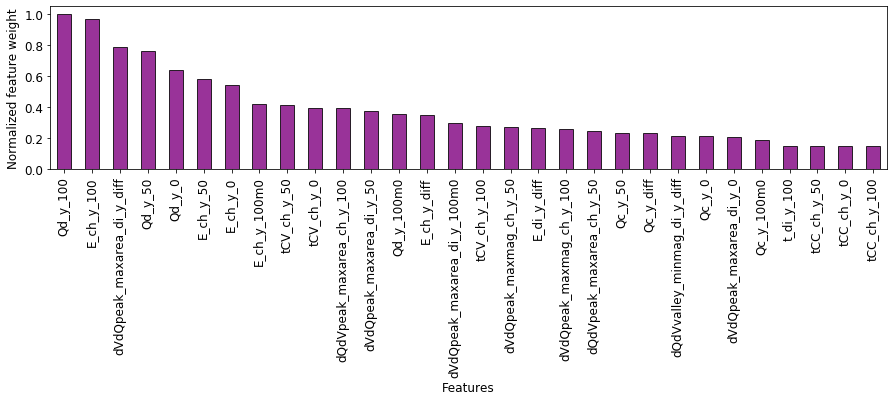

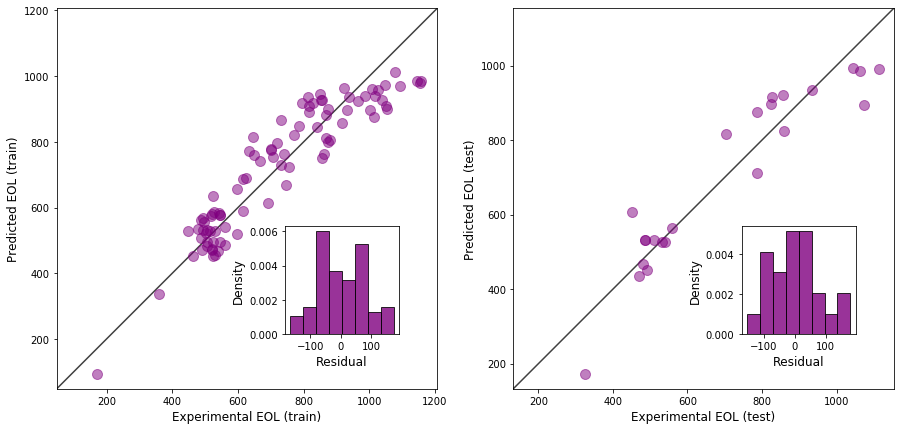

In [41]:
model, metrics = utils_models.fit_nusvr(df=df,
                                        test_size=test_size,
                                        feature_selection=False,
                                        scaling=False,
                                        params=params,
                                        plot=True,
                                        fname='nusvr_model')

### NuSVR with scaling but without feature selection

NuSVR training has started...
NuSVR training has ended after 0.0 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 175.09692074302905,
 'MAPE': 0.2938560599211376,
 'MSE': 40671.19165479711,
 'R2 score': 0.1087813233277024,
 'RMSE': 201.67099854663564}
Test:
{'MAE': 197.65202834071158,
 'MAPE': 0.3383021858142725,
 'MSE': 49710.56955973561,
 'R2 score': 0.09161420387636643,
 'RMSE': 222.9586723133586}


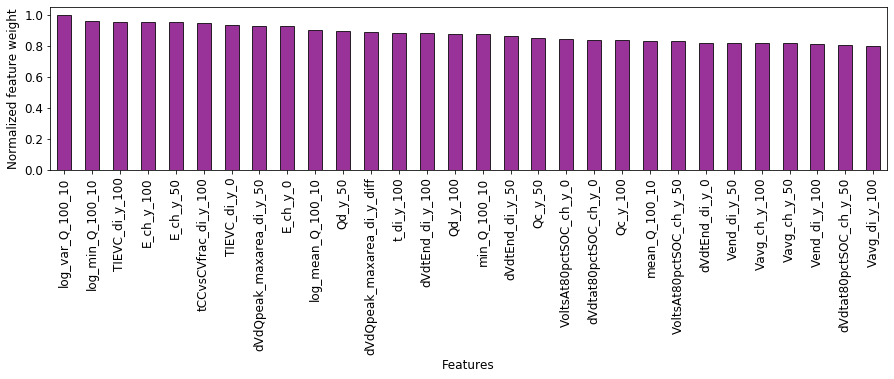

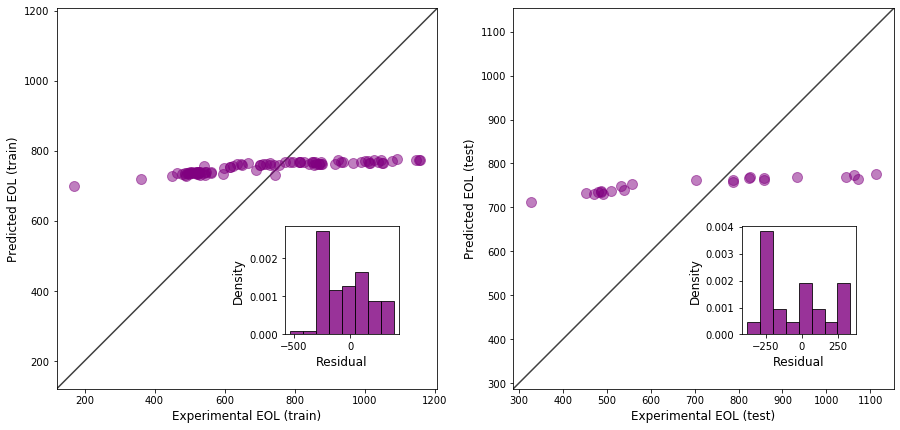

In [42]:
model, metrics = utils_models.fit_nusvr(df=df,
                                        test_size=test_size,
                                        feature_selection=False,
                                        scaling=True,
                                        params=params,
                                        plot=True,
                                        fname='nusvr_scaled_model')

### NuSVR with feature selection and with/without scaling for $k=0.5, 0.6, 0.7, 0.8, 0.9$

In [43]:
# create a list of k
k_list = [0.9, 0.8, 0.6, 0.5, 0.4, 0.3, 0.2]

In [44]:
# A function to fit model with several values of k and choosing whether to perform scaling or not
def k_effect_on_model(scaling, fname):

    metric_list = []

    for k in k_list:
        print('Fitting model with {} percent of features...'.format(int(k*100)))
        model, metrics = utils_models.fit_nusvr(df=df,
                                                test_size=test_size,
                                                feature_selection=True,
                                                scaling=scaling,
                                                params=params,
                                                plot=True,
                                                fname=fname+str(int(k*100)),
                                                k=k)

        metric_list.append(list(metrics[0].values()) + list(metrics[1].values()))

    metric_data = pd.DataFrame(data=np.array(metric_list), columns=[data + metric for data in ('Train_', 'Test_') for metric in metrics[0].keys()], index=np.array(k_list)*100)
    metric_data.index.name = 'Features used (%)'
    
    return metric_data

Fitting model with 90 percent of features...
25 features removed from a total of 244
NuSVR training has started...
NuSVR training has ended after 0.02 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 66.86681469548846,
 'MAPE': 0.09452703240186842,
 'MSE': 6289.580582245869,
 'R2 score': 0.8621778350900178,
 'RMSE': 79.30687600861522}
Test:
{'MAE': 69.7100760410271,
 'MAPE': 0.11077786640805441,
 'MSE': 8646.631281273396,
 'R2 score': 0.8419958348940546,
 'RMSE': 92.98726408102023}


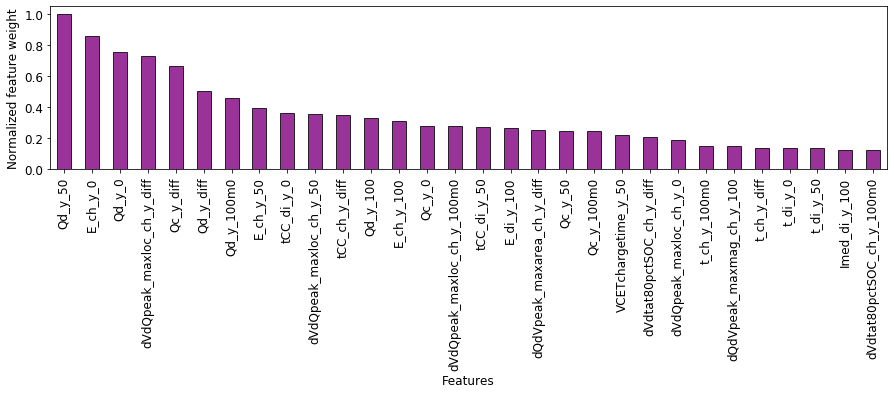

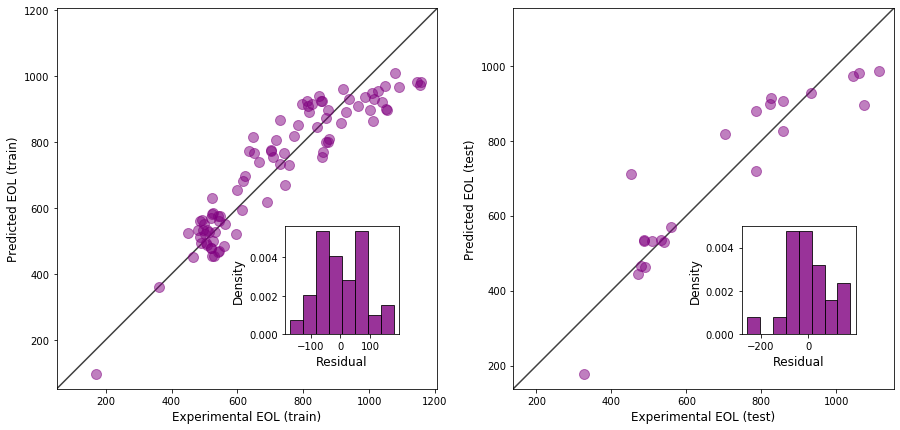

Fitting model with 80 percent of features...
49 features removed from a total of 244
NuSVR training has started...
NuSVR training has ended after 0.01 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 65.54437353588227,
 'MAPE': 0.09246112794984464,
 'MSE': 6136.745446547775,
 'R2 score': 0.865526877049299,
 'RMSE': 78.33738217829196}
Test:
{'MAE': 68.17541455131868,
 'MAPE': 0.10751866196919638,
 'MSE': 8334.213339054917,
 'R2 score': 0.8477048022963374,
 'RMSE': 91.29191278013029}


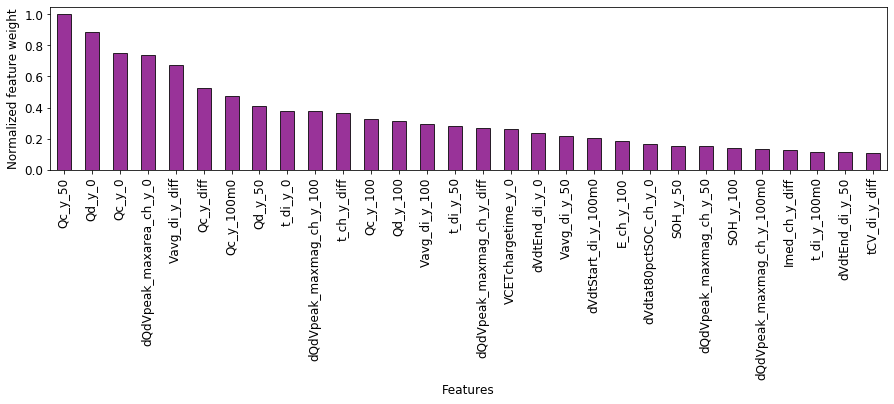

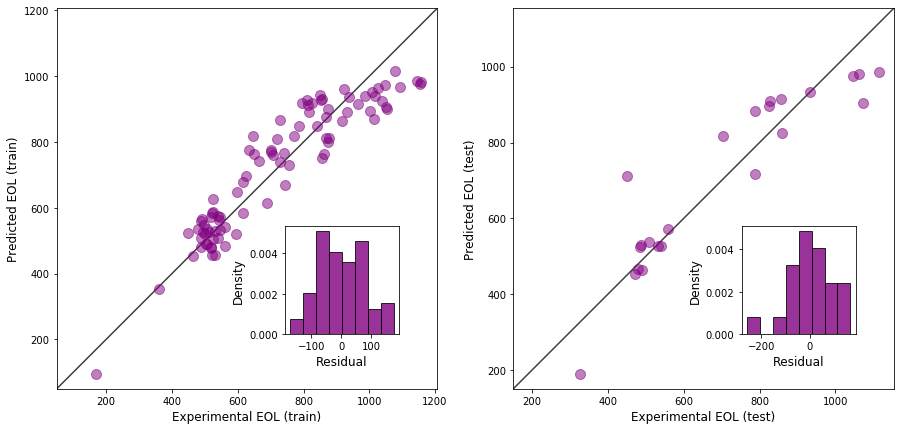

Fitting model with 60 percent of features...
98 features removed from a total of 244
NuSVR training has started...
NuSVR training has ended after 0.0 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 64.95359334099614,
 'MAPE': 0.09111084936631444,
 'MSE': 6112.088539210785,
 'R2 score': 0.8660671783149767,
 'RMSE': 78.17984739823163}
Test:
{'MAE': 68.29599166277377,
 'MAPE': 0.10861531052265576,
 'MSE': 8478.858852149875,
 'R2 score': 0.8450616233761968,
 'RMSE': 92.08071922042026}


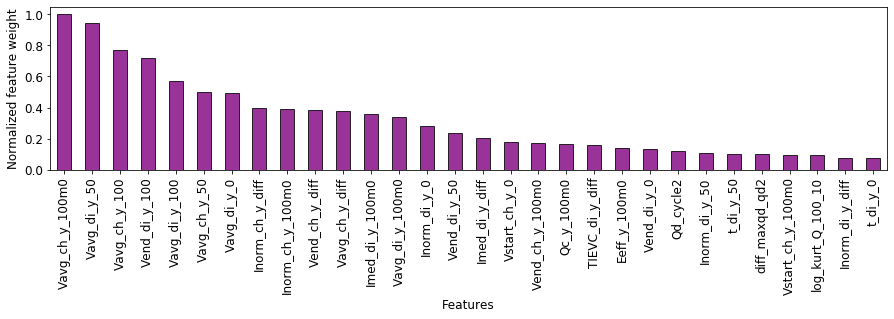

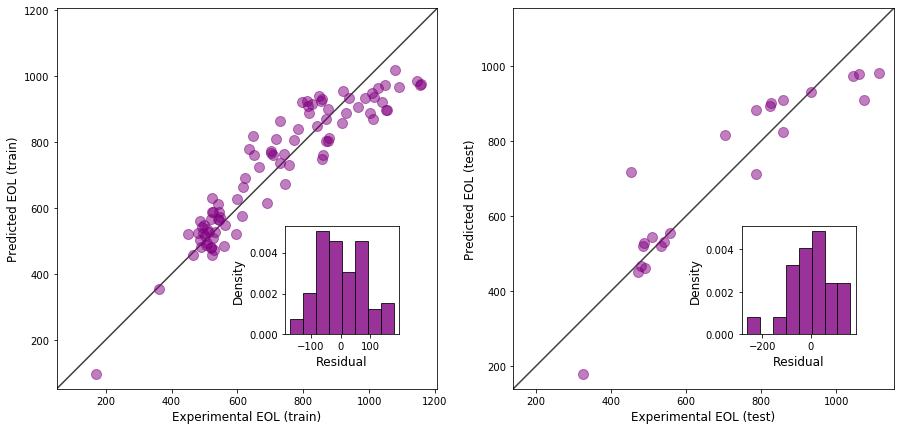

Fitting model with 50 percent of features...
122 features removed from a total of 244
NuSVR training has started...
NuSVR training has ended after 0.01 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 68.07155876370315,
 'MAPE': 0.0968951644082899,
 'MSE': 6423.444221798432,
 'R2 score': 0.8592445112595,
 'RMSE': 80.1463924440672}
Test:
{'MAE': 66.95497939113051,
 'MAPE': 0.10054511384026707,
 'MSE': 7091.1902273392225,
 'R2 score': 0.870419177708574,
 'RMSE': 84.20920512235716}


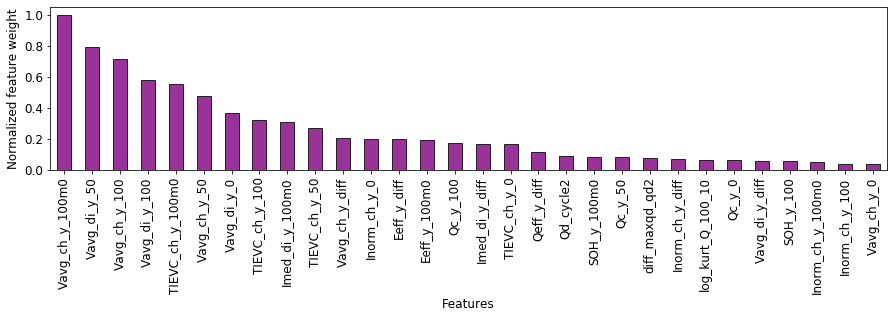

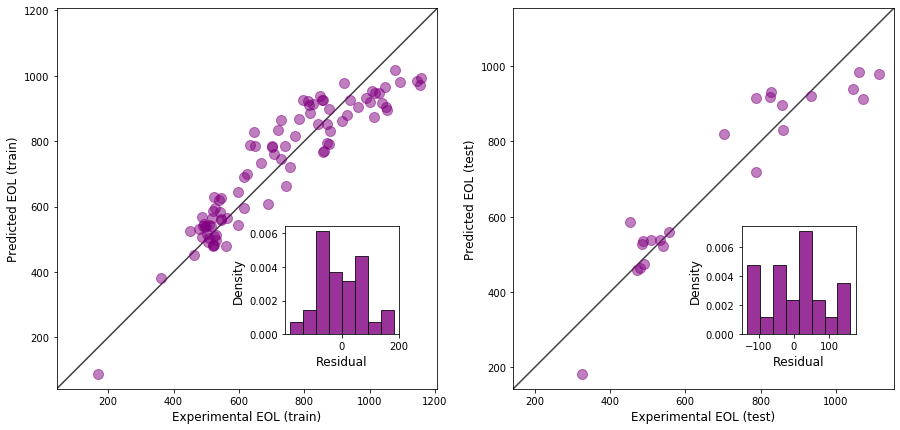

Fitting model with 40 percent of features...
147 features removed from a total of 244
NuSVR training has started...
NuSVR training has ended after 0.0 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 69.77737356288642,
 'MAPE': 0.09925867948724452,
 'MSE': 6719.918821976886,
 'R2 score': 0.8527479300164267,
 'RMSE': 81.97511099093971}
Test:
{'MAE': 66.79087415973545,
 'MAPE': 0.09881645038210199,
 'MSE': 7234.538588607772,
 'R2 score': 0.8677997022845905,
 'RMSE': 85.05609083779817}


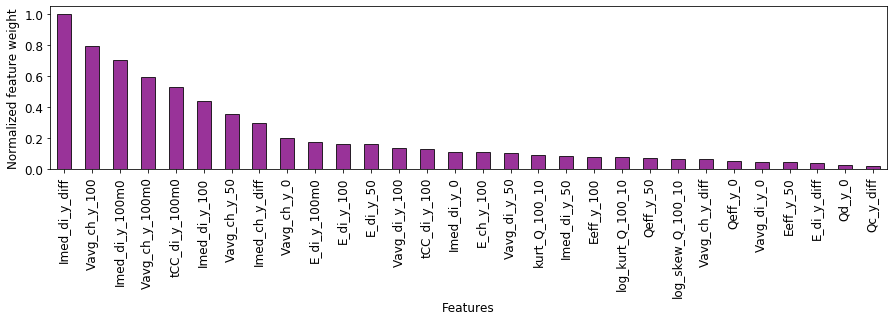

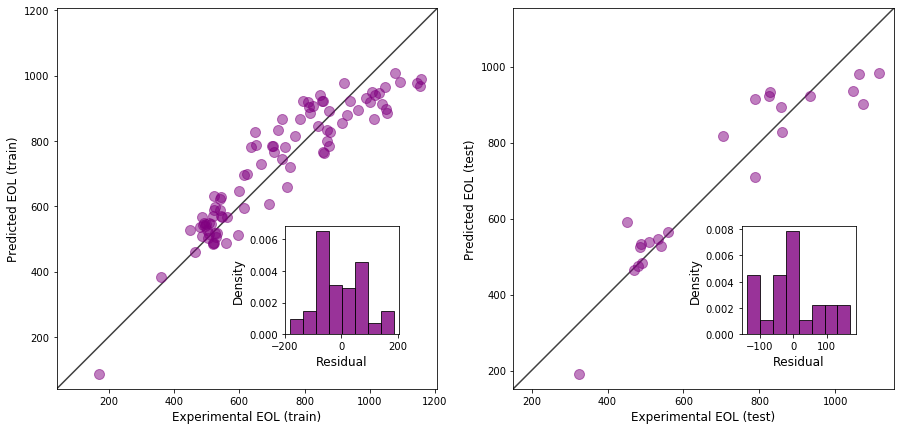

Fitting model with 30 percent of features...
171 features removed from a total of 244
NuSVR training has started...
NuSVR training has ended after 0.0 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 69.21537367133261,
 'MAPE': 0.09838121714673087,
 'MSE': 6768.294325459892,
 'R2 score': 0.8516878884871937,
 'RMSE': 82.26964400956098}
Test:
{'MAE': 61.66446616815001,
 'MAPE': 0.09028575725774428,
 'MSE': 5939.313536093442,
 'R2 score': 0.8914679895504136,
 'RMSE': 77.06694191476292}


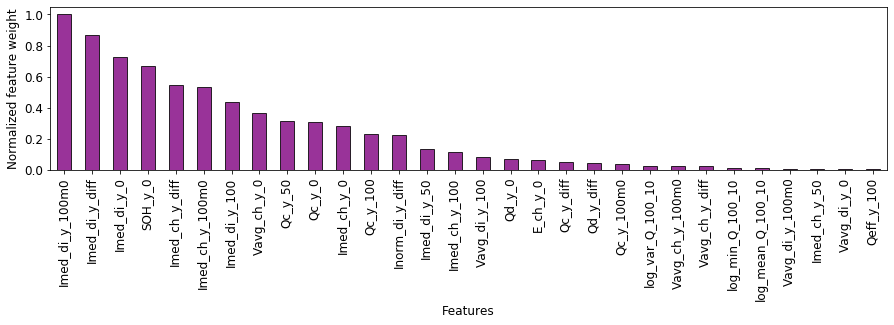

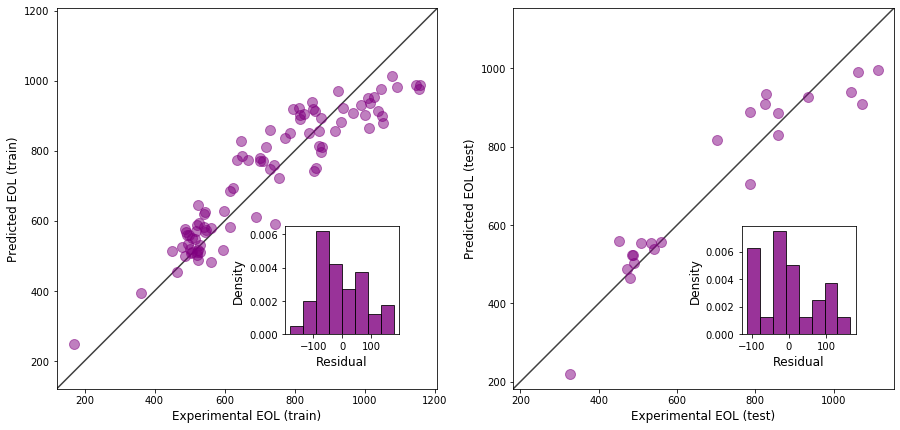

Fitting model with 20 percent of features...
196 features removed from a total of 244
NuSVR training has started...
NuSVR training has ended after 0.0 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 69.64029817392358,
 'MAPE': 0.10265683593969539,
 'MSE': 7146.696679172173,
 'R2 score': 0.8433960428046892,
 'RMSE': 84.53813742431385}
Test:
{'MAE': 63.9876492963275,
 'MAPE': 0.09162623668045564,
 'MSE': 6063.051223612585,
 'R2 score': 0.8892068696561323,
 'RMSE': 77.86559717624071}


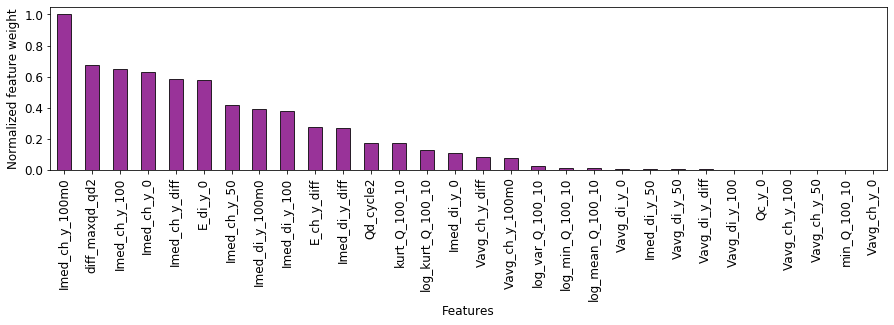

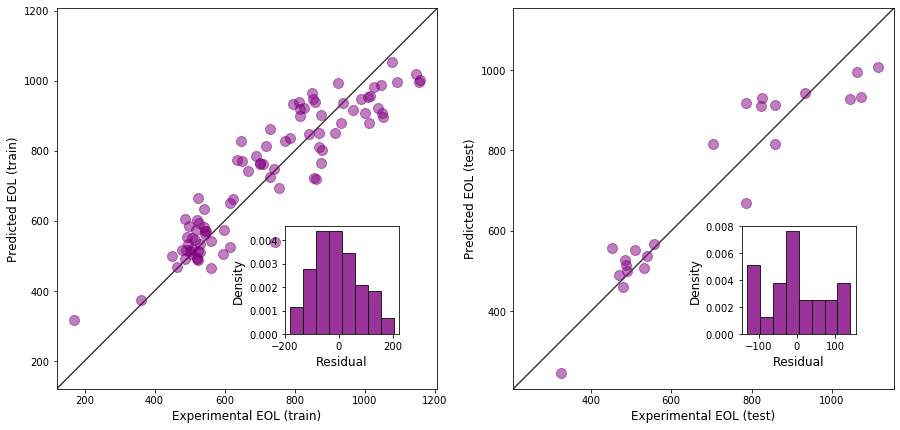

,Train_MAE,Train_MAPE,Train_MSE,Train_RMSE,Train_R2 score,Test_MAE,Test_MAPE,Test_MSE,Test_RMSE,Test_R2 score
Features used (%),,,,,,,,,,
90.0,66.866815,0.094527,6289.580582,79.306876,0.862178,69.710076,0.110778,8646.631281,92.987264,0.841996
80.0,65.544374,0.092461,6136.745447,78.337382,0.865527,68.175415,0.107519,8334.213339,91.291913,0.847705
60.0,64.953593,0.091111,6112.088539,78.179847,0.866067,68.295992,0.108615,8478.858852,92.080719,0.845062
50.0,68.071559,0.096895,6423.444222,80.146392,0.859245,66.954979,0.100545,7091.190227,84.209205,0.870419
40.0,69.777374,0.099259,6719.918822,81.975111,0.852748,66.790874,0.098816,7234.538589,85.056091,0.867800
30.0,69.215374,0.098381,6768.294325,82.269644,0.851688,61.664466,0.090286,5939.313536,77.066942,0.891468
20.0,69.640298,0.102657,7146.696679,84.538137,0.843396,63.987649,0.091626,6063.051224,77.865597,0.889207


In [45]:
# without scaling 
k_effect_on_model(scaling=False, fname='nusvr_model_ftselection_k_')

Fitting model with 90 percent of features...
25 features removed from a total of 244
NuSVR training has started...
NuSVR training has ended after 0.0 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 175.0703041214461,
 'MAPE': 0.2937912974790782,
 'MSE': 40672.664524817475,
 'R2 score': 0.10874904865816237,
 'RMSE': 201.6746501789887}
Test:
{'MAE': 197.61761374448866,
 'MAPE': 0.3382275992424839,
 'MSE': 49685.66987973961,
 'R2 score': 0.09206920803014529,
 'RMSE': 222.90282609186366}


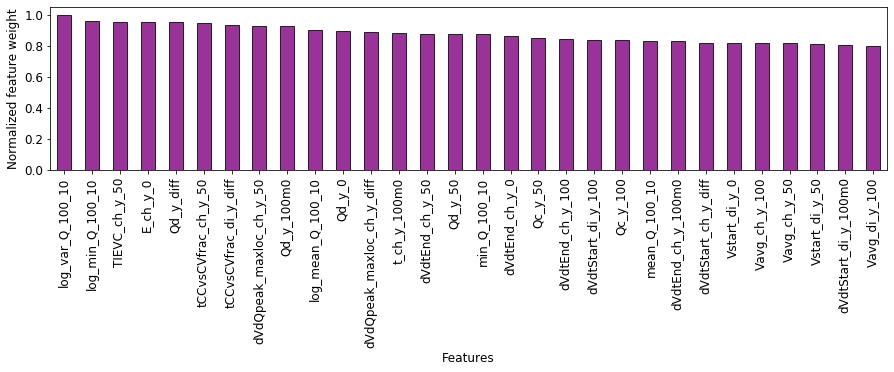

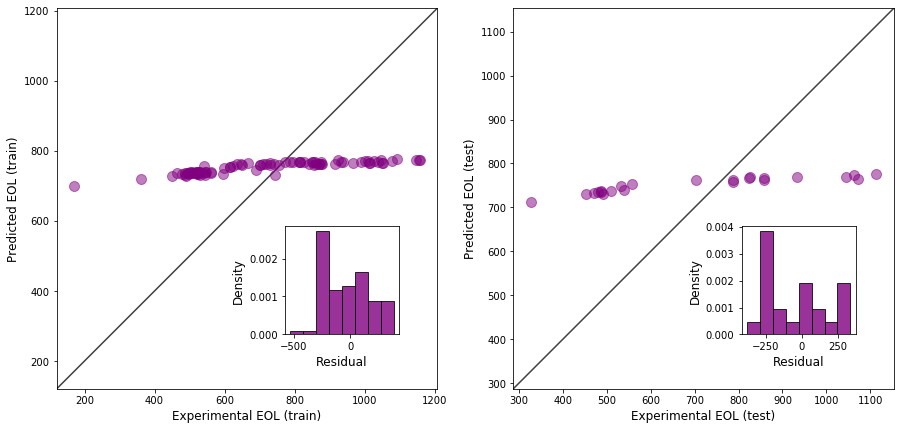

Fitting model with 80 percent of features...
49 features removed from a total of 244
NuSVR training has started...
NuSVR training has ended after 0.0 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 175.03234079263186,
 'MAPE': 0.2936831565016344,
 'MSE': 40671.531884845645,
 'R2 score': 0.10877386794315924,
 'RMSE': 201.6718420723271}
Test:
{'MAE': 197.52206866440815,
 'MAPE': 0.3381012777520319,
 'MSE': 49661.54798177968,
 'R2 score': 0.09250999938853055,
 'RMSE': 222.84871097177043}


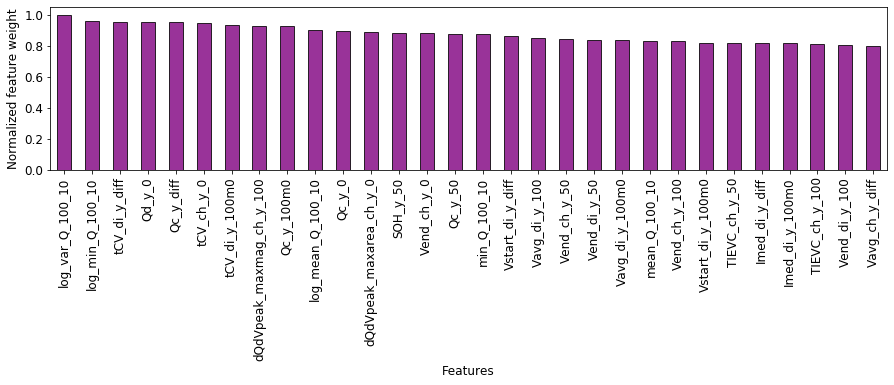

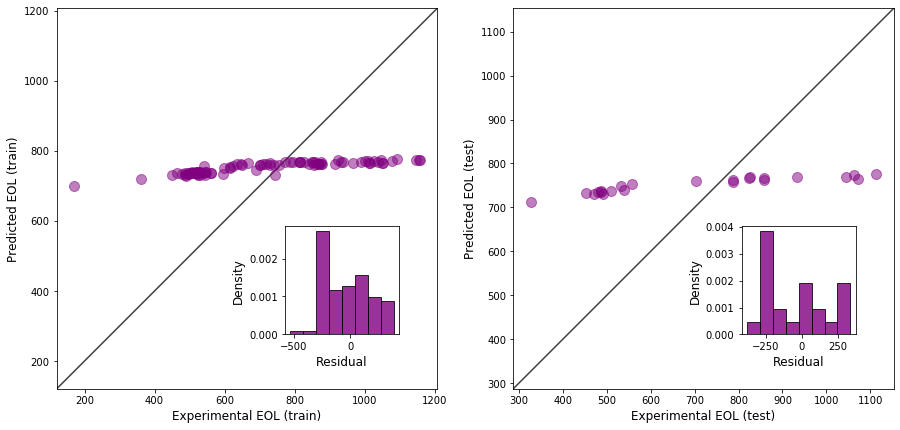

Fitting model with 60 percent of features...
98 features removed from a total of 244
NuSVR training has started...
NuSVR training has ended after 0.0 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 175.1977086580548,
 'MAPE': 0.2940267488502221,
 'MSE': 40751.411924171705,
 'R2 score': 0.10702347460467676,
 'RMSE': 201.86978952822957}
Test:
{'MAE': 197.56566574407222,
 'MAPE': 0.3382737855646595,
 'MSE': 49707.35563687768,
 'R2 score': 0.09167293347652672,
 'RMSE': 222.95146475607123}


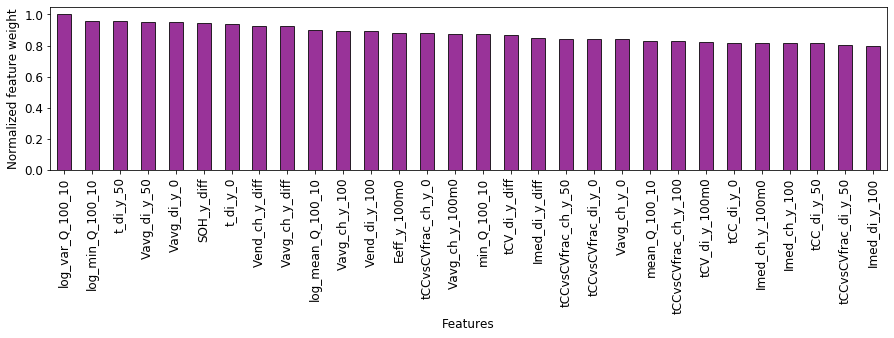

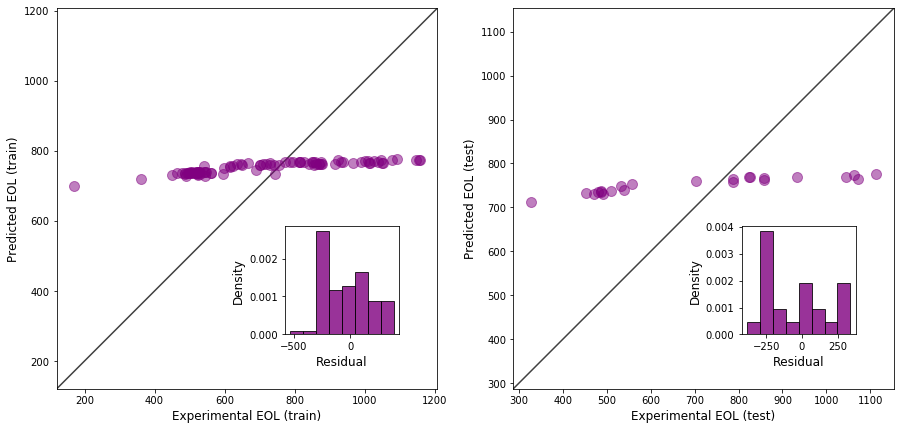

Fitting model with 50 percent of features...
122 features removed from a total of 244
NuSVR training has started...
NuSVR training has ended after 0.0 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 175.42077975104374,
 'MAPE': 0.2944589364713158,
 'MSE': 40867.64164739662,
 'R2 score': 0.10447655881716567,
 'RMSE': 202.15746745395435}
Test:
{'MAE': 197.8081127689335,
 'MAPE': 0.3386759873218312,
 'MSE': 49818.78964518551,
 'R2 score': 0.08963664479087163,
 'RMSE': 223.20123128062156}


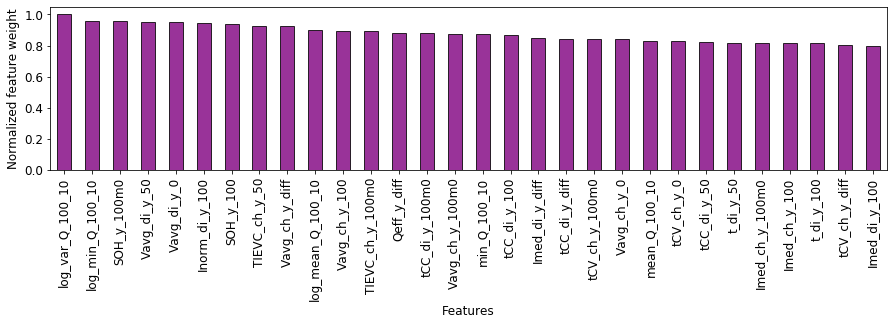

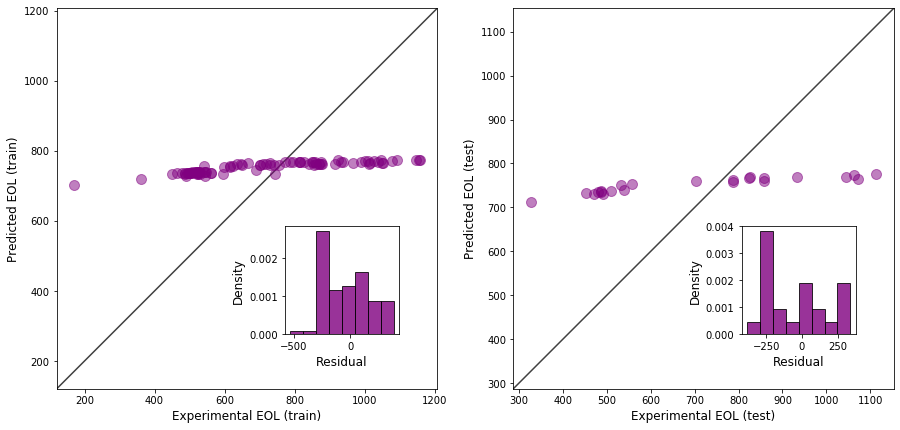

Fitting model with 40 percent of features...
147 features removed from a total of 244
NuSVR training has started...
NuSVR training has ended after 0.0 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 175.84001077429357,
 'MAPE': 0.29522558013635136,
 'MSE': 41083.92726375881,
 'R2 score': 0.09973714074371387,
 'RMSE': 202.69170497027946}
Test:
{'MAE': 198.47459894966778,
 'MAPE': 0.33991735305096077,
 'MSE': 50164.70372660941,
 'R2 score': 0.08331558588875965,
 'RMSE': 223.9747836847028}


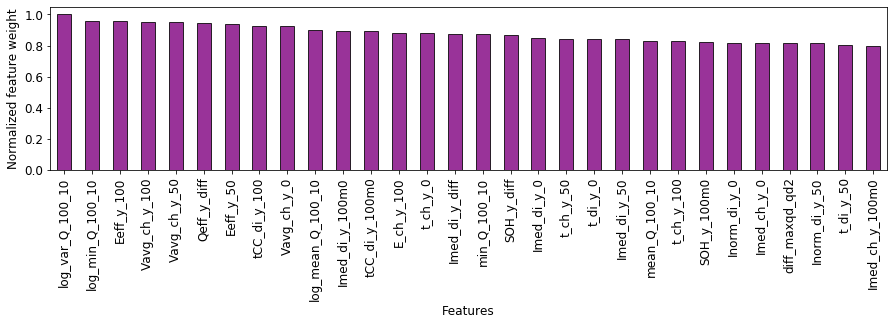

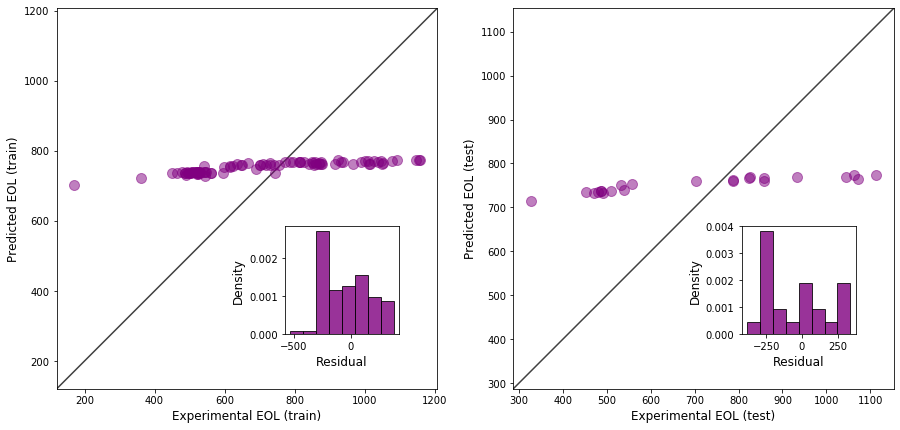

Fitting model with 30 percent of features...
171 features removed from a total of 244
NuSVR training has started...
NuSVR training has ended after 0.0 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 176.93846711947393,
 'MAPE': 0.2977820296636395,
 'MSE': 41682.971358014125,
 'R2 score': 0.0866104222181796,
 'RMSE': 204.16407949983298}
Test:
{'MAE': 199.9445320134482,
 'MAPE': 0.34290001365868983,
 'MSE': 50998.300788541346,
 'R2 score': 0.06808285495335109,
 'RMSE': 225.8280336639837}


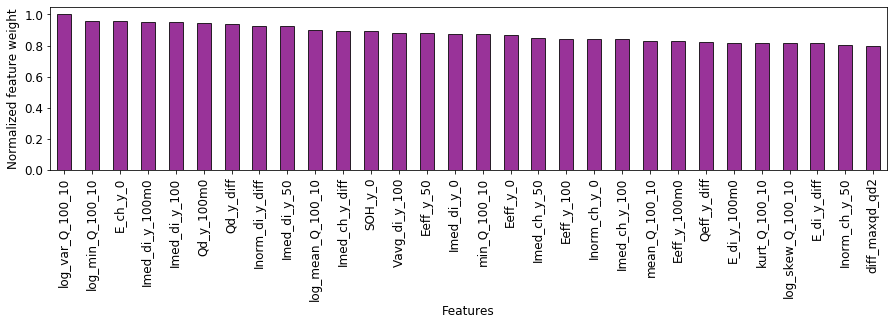

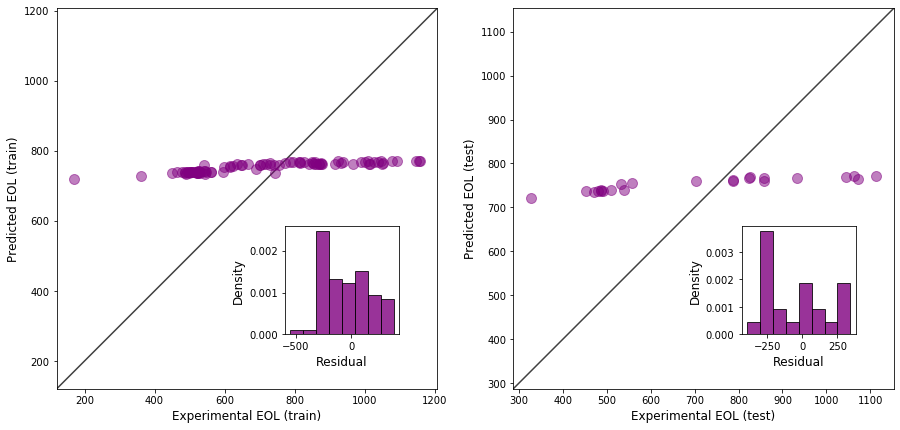

Fitting model with 20 percent of features...
196 features removed from a total of 244
NuSVR training has started...
NuSVR training has ended after 0.0 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 179.4167299688208,
 'MAPE': 0.3022807771952009,
 'MSE': 42882.80305459459,
 'R2 score': 0.06031878006685387,
 'RMSE': 207.08163379352257}
Test:
{'MAE': 202.7649716707285,
 'MAPE': 0.3479547534397075,
 'MSE': 52430.790319958876,
 'R2 score': 0.0419062660516325,
 'RMSE': 228.97770703708008}


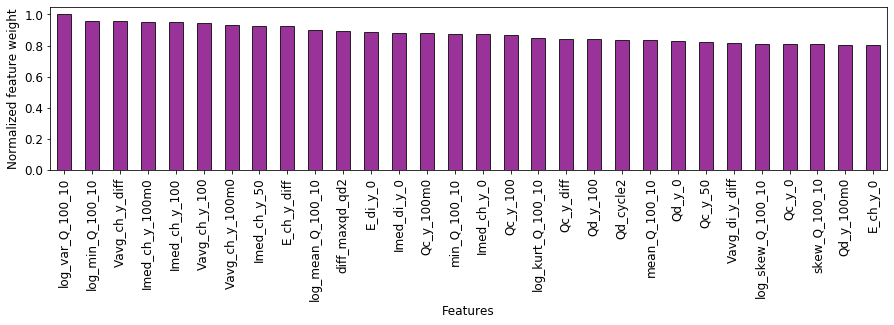

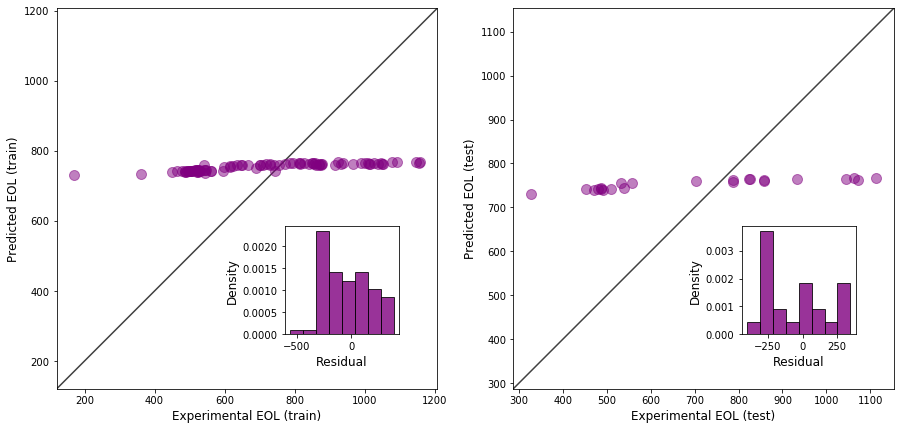

,Train_MAE,Train_MAPE,Train_MSE,Train_RMSE,Train_R2 score,Test_MAE,Test_MAPE,Test_MSE,Test_RMSE,Test_R2 score
Features used (%),,,,,,,,,,
90.0,175.070304,0.293791,40672.664525,201.674650,0.108749,197.617614,0.338228,49685.669880,222.902826,0.092069
80.0,175.032341,0.293683,40671.531885,201.671842,0.108774,197.522069,0.338101,49661.547982,222.848711,0.092510
60.0,175.197709,0.294027,40751.411924,201.869790,0.107023,197.565666,0.338274,49707.355637,222.951465,0.091673
50.0,175.420780,0.294459,40867.641647,202.157467,0.104477,197.808113,0.338676,49818.789645,223.201231,0.089637
40.0,175.840011,0.295226,41083.927264,202.691705,0.099737,198.474599,0.339917,50164.703727,223.974784,0.083316
30.0,176.938467,0.297782,41682.971358,204.164079,0.086610,199.944532,0.342900,50998.300789,225.828034,0.068083
20.0,179.416730,0.302281,42882.803055,207.081634,0.060319,202.764972,0.347955,52430.790320,228.977707,0.041906


In [46]:
# without scaling 
k_effect_on_model(scaling=True, fname='nusvr_model_ftselection_scaled_k_')

### Perform $k$-Fold Repeated Cross-validation on the model with feature selection and best MAPE

In [47]:
model = NuSVR(**params)
best_model_cross_val_scores = utils_models.repeated_kfold_cross_validation(model=model,
                                                                           df=df,
                                                                           n_splits=3,
                                                                           n_repeats=3,
                                                                           feature_selection=True,
                                                                           scaling=False,
                                                                           k=0.4)

best_model_cross_val_scores

147 features removed from a total of 244


{'test_MAE': (71.51290566436404, 8.045040996291338),
 'test_MAPE': (0.10416868899293429, 0.022263202869228685),
 'test_MSE': (7770.067438794921, 1195.5377639141188),
 'test_R2 score': (0.8349023518497583, 0.02163043192116721)}

### Hyper-parameter tuning

In [48]:
estimator = NuSVR()
param_grid = {"nu": [0.1, 0.3, 0.5, 0.7, 0.9],
              "C": [0.001, 0.01, 0.1, 1.0],
              "kernel": ["linear", "poly", "rbf", "sigmoid"]}
scoring = 'neg_mean_absolute_percentage_error'
cv = 3

# for the model without feature selection
best_param_all, _ = utils_models.hyperparameter_tuning(df, estimator, param_grid, scoring, cv, feature_selection=False, k=None)
print(best_param_all)

{'C': 0.01, 'kernel': 'linear', 'nu': 0.3}


In [49]:
# for the model with feature selection
best_param_selected, _ = utils_models.hyperparameter_tuning(df, estimator, param_grid, scoring, cv, feature_selection=True, k=0.4)
print(best_param_selected)

147 features removed from a total of 244
{'C': 0.01, 'kernel': 'linear', 'nu': 0.7}


### Use the best hyper-parameter to rebuild the models and carry out repeated $k$-fold cross-validation

NuSVR training has started...
NuSVR training has ended after 0.01 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 67.30530814787352,
 'MAPE': 0.09631358697186221,
 'MSE': 6226.230428123273,
 'R2 score': 0.8635660127712455,
 'RMSE': 78.90646632642519}
Test:
{'MAE': 65.30517116516057,
 'MAPE': 0.10220438326705207,
 'MSE': 6769.31660401846,
 'R2 score': 0.8763009334430377,
 'RMSE': 82.27585675043719}


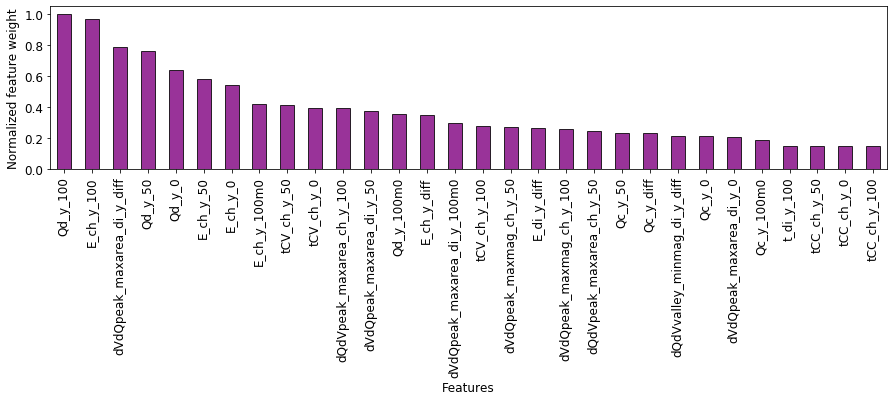

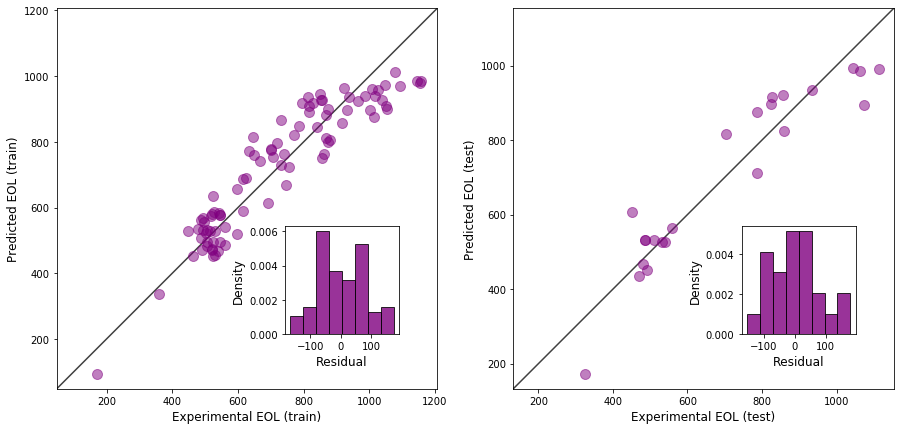

In [50]:
# for the model using all the features 
best_model_all, metrics_all = utils_models.fit_nusvr(df=df,
                                                    test_size=test_size,
                                                    feature_selection=False,
                                                    scaling=False,
                                                    params=best_param_all,
                                                    plot=True,
                                                    fname='best_all_features_nusvr_model')

147 features removed from a total of 244
NuSVR training has started...
NuSVR training has ended after 0.01 seconds
------------------
Model metrics:
------------------
Train:
{'MAE': 60.931914454007995,
 'MAPE': 0.08261490979039748,
 'MSE': 6125.914997029801,
 'R2 score': 0.8657642022540557,
 'RMSE': 78.26822469578444}
Test:
{'MAE': 60.5990273856451,
 'MAPE': 0.09193961069291208,
 'MSE': 5826.461460572214,
 'R2 score': 0.8935301912788282,
 'RMSE': 76.33126135845139}


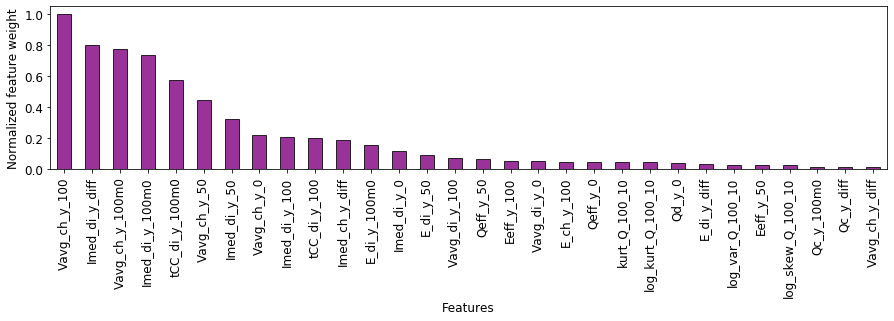

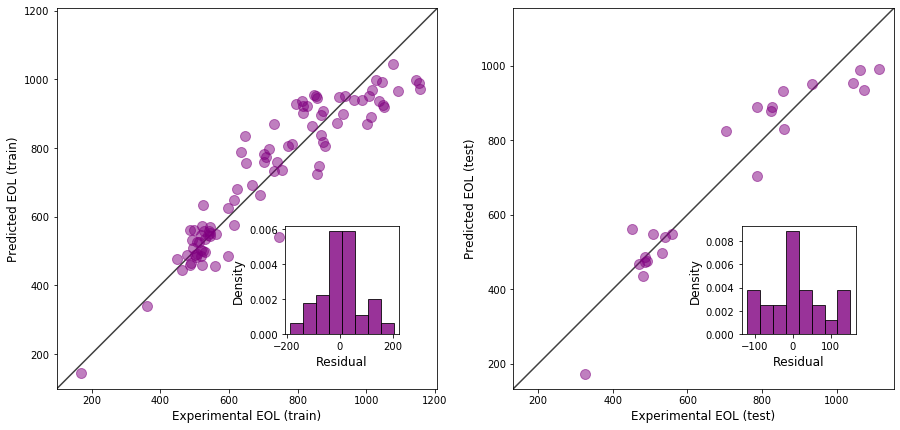

In [51]:
# for the model using selected features 
best_model_selected, metrics_selected = utils_models.fit_nusvr(df=df,
                                                               test_size=test_size,
                                                               feature_selection=True,
                                                               scaling=False,
                                                               params=best_param_selected,
                                                               plot=True,
                                                               fname='best_selected_features_nusvr_model',
                                                               k=0.4)

In [52]:
# Repeated k-fold cross-validation for the model obtained from grid search and using all features
model = NuSVR(**best_param_all)
utils_models.repeated_kfold_cross_validation(model=model,
                                            df=df,
                                            n_splits=3,
                                            n_repeats=3,
                                            feature_selection=False,
                                            scaling=False)



{'test_MAE': (81.16036630346906, 16.485396855684783),
 'test_MAPE': (0.12076904087412735, 0.037868088749900004),
 'test_MSE': (15121.782570383764, 11812.94195881299),
 'test_R2 score': (0.6914300890668333, 0.21878112247176842)}

In [53]:
# Repeated k-fold cross-validation for the model obtained from grid search and using selected features
model = NuSVR(**best_param_selected)
utils_models.repeated_kfold_cross_validation(model=model,
                                            df=df,
                                            n_splits=3,
                                            n_repeats=3,
                                            feature_selection=True,
                                            scaling=False,
                                            k=0.4)



147 features removed from a total of 244


{'test_MAE': (70.24917505270872, 8.756442373714824),
 'test_MAPE': (0.09944499215453231, 0.018654661310826354),
 'test_MSE': (9231.893484980908, 3135.010691466195),
 'test_R2 score': (0.8079612934278229, 0.048084056540738454)}